In [ ]:
'''
##############################################################################
Nice!
Do not use global variables inside functions, this easily leads to errors that are hard to track down!

1: 90%
2: 100%
3: 95% 
Bonus: 70% (of 5% extra)

see detailed feedback inline below!
##############################################################################
''';

# MNS CP 5 
Quinten de Block & Gonzalo Cardenal

## 1.Synaptic current

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.signal import find_peaks

In [2]:
Tm = 10*(10**(-3)) #s
'''
##############################################################################
tip: short for 10**(-3):
1e-3
##############################################################################
''';
Tsyn = 10*10**(-3) #s
Rm = 10**7 #Ohm
gstat = 30*(10**(-9)) #S
Em = -80*(10**(-3)) #V
RmIe = 0 
x_0 = 0
gsyn_0 = 0
Isynval_0= 0

In [3]:
def delta(t, tspike, dt):
    if tspike >= t and tspike < t+dt:
        return 1
    '''
    ##############################################################################
    revisit explanation of Dirac Delta from last tutorial!
    A numerical implementation of a Dirac "function" must have value 1/dt (not 1!) in 0
    ##############################################################################
    ''';
    else: 
        return 0
    
def diffx(x, t, tspike, dt):
    return (-x*dt + Tsyn*gstat*delta(t, tspike, dt))/Tsyn #!!
    '''
    ##############################################################################
    correct! You did not multiply the second part by dt, which resolves the problem above.
    Would be slightly clearer though conceptually to have delta=1/dt and then multiply 
    in the euler update by dt, such that it cancels.
    ##############################################################################
    ''';
    
def diffgsyn(x, gsyn):
    return (x - gsyn)/Tsyn

def Isyn(gsyn, V, Esyn):
    return gsyn*(V - Esyn)

def diffV(V, Isyn, gsyn):
    return (-V + Em - Rm*Isyn(gsyn, V, Esyn) + RmIe)/Tm


def euler(x_0, gsyn_0, V_0, t):
    x = np.zeros(len(t))
    gsyn = np.zeros(len(t))
    V = np.zeros(len(t))
    Isynvalues=np.zeros(len(t))
    x[0]= x_0
    gsyn[0]= gsyn_0
    V[0] = V_0
    Isynvalues[0]= Isynval_0
    for i in range(0,len(t)-1):
        x[i+1] = x[i] + diffx(x[i], t[i], tspike, dt)
        gsyn[i+1] = gsyn[i] + diffgsyn(x[i], gsyn[i])*dt
        V[i+1] = V[i] + diffV(V[i], Isyn, gsyn[i])*dt
        Isynvalues[i+1] = Isyn(gsyn[i+1], V[i+1], Esyn)
    return x, gsyn, V, Isynvalues

In [4]:
dt = 0.00001
t_max= 0.200
t = np.arange(0, t_max, dt)
tspike = 54*10**-3

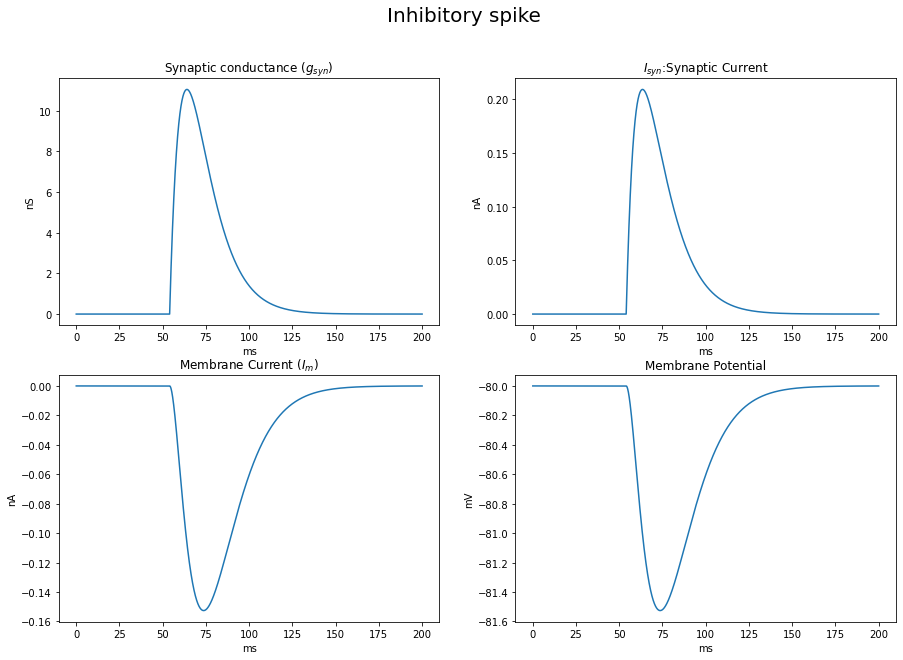

In [5]:
Esyn = Einh = -100*10**-3
x, gsyn, V, Isynvalues = euler(x_0, gsyn_0, Em, t)
Im = (V - Em)/Rm
fig, axs = plt.subplots(2,2, figsize= (15,10))
plt.suptitle("Inhibitory spike", size = 20)
plt.ticklabel_format(useOffset=False, style='plain')
axs[0,0].plot(t*10**3,gsyn*10**9)
axs[0,0].set_title("Synaptic conductance ($g_{syn}$)")
axs[0,0].set_xlabel("ms")
axs[0,0].set_ylabel("nS")
axs[0,1].plot(t*10**3,Isynvalues*10**9)
axs[0,1].set_title(r"$I_{syn}$:Synaptic Current")
axs[0,1].set_xlabel("ms")
axs[0,1].set_ylabel("nA")
axs[1,0].plot(t*10**3,Im*(10**9))
axs[1,0].set_title("Membrane Current ($I_m$)")
axs[1,0].set_xlabel("ms")
axs[1,0].set_ylabel("nA")
axs[1,1].plot(t*10**3,V*10**3)
axs[1,1].set_title("Membrane Potential")
axs[1,1].set_xlabel("ms")
axs[1,1].set_ylabel("mV");

In [ ]:
'''
##############################################################################
Nice! 
Common axis of all plots is x-axis, so makes more sense to stack all plots vertically!
##############################################################################
''';

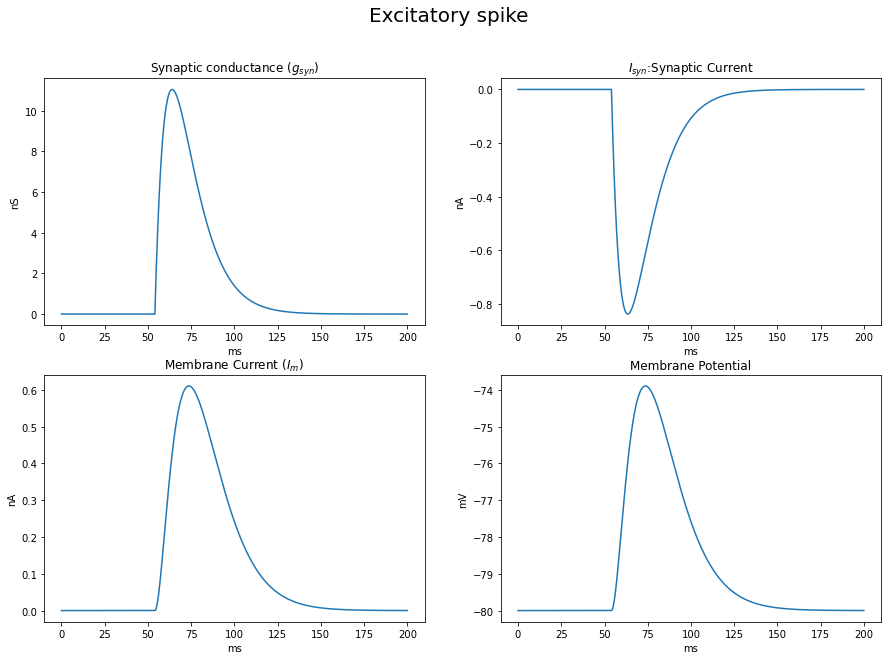

In [6]:
Esyn = Eexc = 0
x, gsyn, V, Isynvalues = euler(x_0, gsyn_0, Em, t)
Im = (V - Em)/Rm
fig, axs = plt.subplots(2,2, figsize= (15,10))
plt.suptitle("Excitatory spike", size = 20)
plt.ticklabel_format(useOffset=False, style='plain')
axs[0,0].plot(t*10**3,gsyn*10**9)
axs[0,0].set_title("Synaptic conductance ($g_{syn}$)")
axs[0,0].set_xlabel("ms")
axs[0,0].set_ylabel("nS")
axs[0,1].plot(t*10**3,Isynvalues*10**9)
axs[0,1].set_title(r"$I_{syn}$:Synaptic Current")
axs[0,1].set_xlabel("ms")
axs[0,1].set_ylabel("nA")
axs[1,0].plot(t*10**3,Im*10**9)
axs[1,0].set_title(r"Membrane Current ($I_m$)")
axs[1,0].set_xlabel("ms")
axs[1,0].set_ylabel("nA")
axs[1,1].plot(t*10**3,V*10**3)
axs[1,1].set_title("Membrane Potential")
axs[1,1].set_xlabel("ms")
axs[1,1].set_ylabel("mV");

### 1b) Shunting Inhibition

In [7]:
#Now we change the function for Isyn
def IsynSI(gsyn, V, Esyn):
    return gsyn*(V-Esyn) + gexc*(V-Eexc) + ginh*(V-Einh)
'''
##############################################################################
do not use global variables inside of functions!!
##############################################################################
''';

Einh= -100*10**-3 #mV
Eexc= 0 #mV
gexc= 50*10**-9 #nS
ginh= 200*10**-9 #nS

def diffVSI(V, IsynSI, gsyn):
    return (-V + Em - Rm*IsynSI(gsyn, V, Esyn) + RmIe)/Tm

def eulerSI(x_0, gsyn_0, V_0, t):
    x = np.zeros(len(t))
    gsyn = np.zeros(len(t))
    V = np.zeros(len(t))
    x[0]= x_0
    gsyn[0]= gsyn_0
    V[0] = V_0
    IsynvaluesSI=np.zeros(len(t))
    for i in range(0,len(t)-1):
        IsynvaluesSI[i] = IsynSI(gsyn[i], V[i], Esyn)
        x[i+1] = x[i] + diffx(x[i], t[i], tspike, dt)
        gsyn[i+1] = gsyn[i] + diffgsyn(x[i+1], gsyn[i])*dt
        V[i+1] = V[i] + diffVSI(V[i], IsynSI, gsyn[i+1])*dt
    return x, gsyn, V, IsynvaluesSI

The maximum voltage with Shunting inhibition and Excitatory is -77.6653mV
The maximum voltage without Shunting inhibition is -73.8969mV


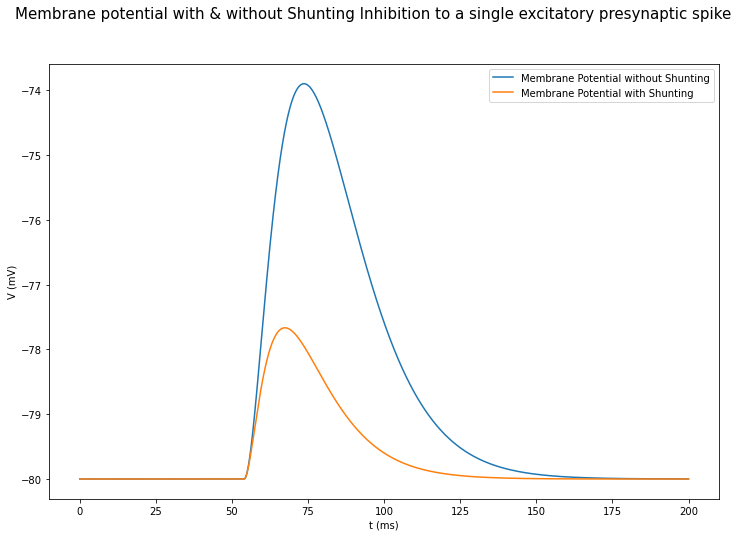

In [8]:
Esyn = Eexc
xSI1, gsynSI1, VSI1, IsynvaluesSI1 = eulerSI(x_0, gsyn_0, Em, t)
x1, gsyn1, V1, Isynvalues1 = euler(x_0, gsyn_0, Em, t)
Esyn = Einh
xSI2, gsynSI2, VSI2, IsynvaluesSI2 = eulerSI(x_0, gsyn_0, Em, t)
x2, gsyn2, V2, Isynvalues2 = euler(x_0, gsyn_0, Em, t)

figSI, axsSI = plt.subplots( 1, 1, figsize= (12,8))
plt.suptitle('Membrane potential with & without Shunting Inhibition to a single excitatory presynaptic spike', size =15)
axsSI.ticklabel_format(useOffset=False, style='plain')
axsSI.plot(t*10**3,V*10**3)
axsSI.plot(t*10**3,VSI1*10**3)
axsSI.set_xlabel('t (ms)')
axsSI.set_ylabel('V (mV)')
axsSI.legend(['Membrane Potential without Shunting', 'Membrane Potential with Shunting'])


print('The maximum voltage with Shunting inhibition and Excitatory is ' + str(round(np.max(VSI1)*10**3,4)) + 'mV')
print('The maximum voltage without Shunting inhibition is ' + str(round(np.max(V)*10**3,4)) + 'mV');

In [9]:
##This one was not needed
#figSI, axsSI = plt.subplots( 1, 2, figsize= (15,10))
#axsSI[0].ticklabel_format(useOffset=False, style='plain')
#axsSI[0].plot(t*10**3,V*10**3)
#axsSI[0].plot(t*10**3,VSI1*10**3)
#axsSI[0].legend(['Membrane Potential without Shunting', 'Membrane Potential with Shunting'])
#axsSI[1].ticklabel_format(useOffset=False, style='plain')
#axsSI[1].plot(t*10**3,V2*10**3)
#axsSI[1].plot(t*10**3,VSI2*10**3)
#axsSI[1].legend(['Membrane Potential without Shunting', 'Membrane Potential with Shunting'])

#### Why the differences?
Comparing voltages, the membrane potential without shunting inhibition had a bigger response to the presynaptic excitatory input than the one with. Moreover, the one without shunting inhibition had as well a broader curve. 
The reason for this lies 

In [ ]:
'''
##############################################################################
... ?
##############################################################################
''';

## Exercise 2. Integrate-and-fire neuron

#### a) Setting a reset treshold

In [10]:
Vthresh= -54*10**-3 #V
Vreset = Em #V

In [11]:
def diffVIsyn0(V, RmIe):
    return (-V + Em + RmIe)/Tm

def eulerreset(V_0, t):
    V = np.zeros(len(t))
    V[0] = V_0
    for i in range(0,len(t)-1):
        if V[i] >= Vthresh :
            V[i+1] = Vreset
        else:
            V[i+1] = V[i] + diffVIsyn0(V[i], RmIe)*dt
    return V 

#### b) Voltage traces over 100ms with constant input current

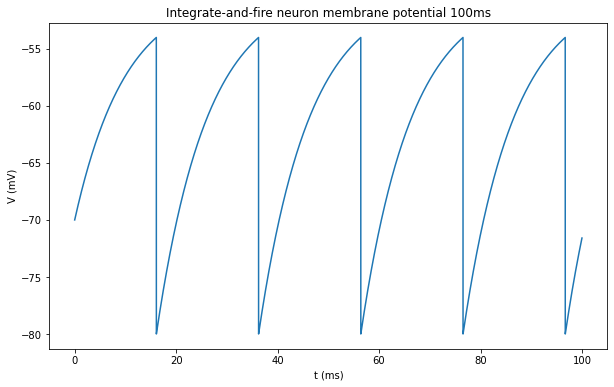

The firing rate using spike count for 100 ms is 50.0 Hz.
The firing rate calculated by ISI for 100 ms is 49.63 Hz.


In [12]:
RmIe = 10**7 * 3*10**-9 #Ohm*A = V
dt = 0.00001
t_max= 0.1
t = np.arange(0,t_max,dt)
Vres = eulerreset(-random.randint(round(-Vthresh*10**3),round(-Em*10**3))/10**3, t)

plt.figure(figsize=(10,6))
plt.plot(t*10**3,Vres*10**3)
plt.xlabel("t (ms)")
plt.ylabel("V (mV)")
plt.title("Integrate-and-fire neuron membrane potential 100ms")
plt.show()

fires,prop = find_peaks(Vres)
'''
##############################################################################
no need for fancy predefined functions here!
try to find an easy self-written solution to extract the spike times
##############################################################################
''';

firing_rate_1 = round(len(fires) / t_max,2)

firing_rate_isi_1 = np.zeros(len(fires)-1) 
for p in range (0,len(fires)-1):
    firing_rate_isi_1[p] =(fires[p+1]-fires[p])*dt
'''
##############################################################################
check out np.diff() 
write reusable functions!
##############################################################################
''';
firing_rate_isi_1 = round(1/np.mean(firing_rate_isi_1),2)

print('The firing rate using spike count for 100 ms is ' + str(firing_rate_1) + ' Hz.')
print('The firing rate calculated by ISI for 100 ms is ' + str(firing_rate_isi_1) + ' Hz.')

We can observe both measures doesn't coincide. The ISIS method gives a more precise value. As it counts avarage inter-spike interval, its accuracy depends only on dt. In the other hand, the spike count sometimes give 40Hz and other 50Hz as It depends on the initialization of the voltage which is random. Thus, we could conclude spike count doesn't work well for small time windows.

In [ ]:
'''
##############################################################################
Nice! 
##############################################################################
''';

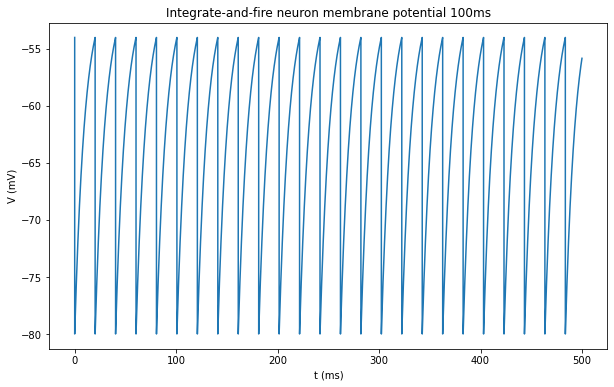

The firing rate using spike count for 500 ms is 48.0 Hz.
The firing rate calculated by ISI for 500 ms is 49.63 Hz.


In [13]:
RmIe = 10**7 * 3*10**-9 #Ohm*A = V
dt = 0.00001
t_max= 0.5
t = np.arange(0,t_max,dt)
Vres = eulerreset(-random.randint(round(-Vthresh*10**3),round(-Em*10**3))/10**3, t)

plt.figure(figsize=(10,6))
plt.plot(t*10**3,Vres*10**3)
plt.xlabel("t (ms)")
plt.ylabel("V (mV)")
plt.title("Integrate-and-fire neuron membrane potential 100ms")
plt.show()

fires,prop = find_peaks(Vres)

firing_rate_1 = round(len(fires) / t_max,2)

firing_rate_isi_1 = np.zeros(len(fires)-1) 
for p in range (0,len(fires)-1):
    firing_rate_isi_1[p] =(fires[p+1]-fires[p])*dt
firing_rate_isi_1 = round(1/np.mean(firing_rate_isi_1),2)

print('The firing rate using spike count for 500 ms is ' + str(firing_rate_1) + ' Hz.')
print('The firing rate calculated by ISI for 500 ms is ' + str(firing_rate_isi_1) + ' Hz.')

Now the spike count is giving a more precise value as the time window is bigger. The result of ISI doesn't change as dt continue to be the same one.
For this reason, we should use ISI method for small time windows.

### c) Calculating numerically the mean fire rate as function of input current in the range 0nA to 5nA 

In [14]:
Ie = np.linspace(0, 5*10**-9, 30)
RmIe= np.array(10**7 * Ie)

In [15]:
def firing_rates_over_Ie(V_0, Ie):
    firing_rate_count=np.zeros(len(Ie))
    firing_rate_isi=np.zeros(len(Ie))
    firing_rate_theorical=np.zeros(len(Ie))
    
    V = np.zeros(len(t))
    V[0] = Em
    for i in range(0,len(Ie)):
        #calculate voltage for each Ie iteration
        for j in range(0,len(t)-1):
            if V[j] >= Vthresh :
                V[j+1] = Vreset
            else:
                V[j+1] = V[j] + diffVIsyn0(V[j], 10**7*Ie[i])*dt

        fires,prop = find_peaks(V)

        firing_rate_count[i] = round(len(fires) / t_max,2)
        
        if firing_rate_count[i] > 0:
            
            fire_rate_isi = np.zeros(len(fires)-1) 
            
            for p in range (0,len(fires)-1):
                fire_rate_isi =(fires[p+1]-fires[p])*dt
                
            firing_rate_isi[i] = (np.mean(fire_rate_isi))**-1


        if Rm*Ie[i]/(Rm*Ie[i]+Em-Vthresh) <= 0:
            firing_rate_theorical[i]= 0
        else:
            firing_rate_theorical[i]= (Tm*np.log(Rm*Ie[i]/(Rm*Ie[i]+Em-Vthresh)))**-1

    return firing_rate_count, firing_rate_isi, firing_rate_theorical

In [16]:
firing_rate_count, firing_rate_isi, firing_rate_theorical = firing_rates_over_Ie(-random.randint(round(-Vthresh*10**3),round(-Em*10**3))/10**3,Ie)

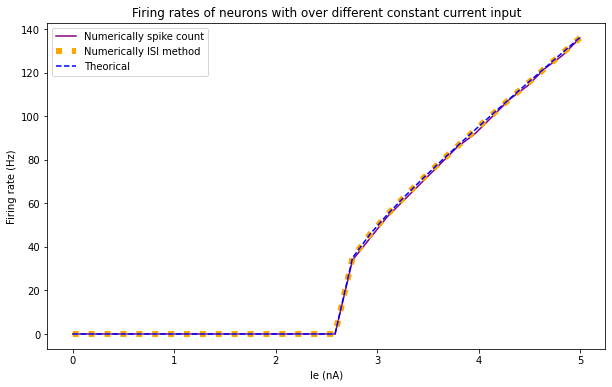

In [17]:
plt.figure(figsize=(10,6))
plt.plot(Ie*10**9,firing_rate_count, label="Numerically spike count", color= 'purple')
plt.plot(Ie*10**9,firing_rate_isi, label="Numerically ISI method", color='orange', linestyle="dotted", linewidth=6)
plt.plot(Ie*10**9,firing_rate_theorical, label="Theorical", color='blue', linestyle="dashed")
plt.legend()
plt.xlabel("Ie (nA)")
plt.ylabel("Firing rate (Hz)")
plt.title("Firing rates of neurons with over different constant current input")
plt.show()

mse_firing_count= sum(((firing_rate_theorical-firing_rate_count)**2))/len(firing_rate_theorical)
mse_firing_rate_isi= sum(((firing_rate_theorical-firing_rate_isi)**2))/len(firing_rate_theorical)

In [18]:
print('The MSE of the spike count method is ' + str(round(mse_firing_count,4)) + ' and the MSE of ISI method is ' + str(round(mse_firing_rate_isi,4)))

The MSE of the spike count method is 0.5978 and the MSE of ISI method is 0.0077


Results Interpretation:

Until the current arrives to the minimum nA to trigger the neuron firing and overcome the threshold the firing rate frequency is 0. Afterwards, the frecuency follows a semilinear fuction over the current input.

The MSE of the spike count method is bigger than the one of ISI. Again we can conclude ISI method is better.

In a real neuron, we expect to see the same until it gets saturated and arrives to its maximum firing rate.

In [ ]:
'''
##############################################################################
Increase resolution of Ie to see how discontinuous the purple curve really is.
"semilinear function" ??
Correct answer! Additional aspect: how does noise change this plot?
##############################################################################
''';

## Exercise 3: Synaptically coupled IF neurons 

In [19]:
Tm = 10*(10**(-3)) #s
Tsyn = 10*10**(-3) #s
Rm = 10**7 #Ohm
gstat = 30*(10**(-9)) #S
Em = -70*(10**(-3)) #V
RmIe = 10**7*3.5*10**-9 
x_0 = 0
gsyn_0 = 0
Isynval_0= 0
Vthresh= -54*10**-3 #V
Vreset = -80*10**-3 #V

In [20]:
def eulernrn(x_0, gsyn_0, V1_0, V2_0, tspike1_0, t):
    x1 = np.zeros(len(t))
    x2 = np.zeros(len(t))
    gsyn1 = np.zeros(len(t))
    gsyn2 = np.zeros(len(t))
    V1 = np.zeros(len(t))
    V2 = np.zeros(len(t))
    tspike1 = np.zeros(len(t))
    tspike2 = np.zeros(len(t))
    Isynvalues1=np.zeros(len(t))
    Isynvalues2=np.zeros(len(t))
    '''
    ##############################################################################
    Instead of having two arrays for each variable, you could use 2D arrays of shape (len(t), 2)
    ##############################################################################
    ''';
    x1[0]= x_0
    x2[0]= x_0
    gsyn1[0]= gsyn_0
    gsyn2[0]= gsyn_0
    V1[0] = V1_0
    V2[0] = V2_0
    tspike1[0] = tspike1_0
    #to make sure neuron 2 has no spike at t=0
    tspike2[0] = 1
    Isynvalues1[0]= Isynval_0
    Isynvalues2[0]= Isynval_0
    for i in range(0,len(t)-1):
        #synaptically coupled via using tspike from other neuron to update x, gsyn and V
        x1[i+1] = x1[i] + diffx(x1[i], t[i], tspike2[i], dt)
        x2[i+1] = x2[i] + diffx(x2[i], t[i], tspike1[i], dt)
        gsyn1[i+1] = gsyn1[i] + diffgsyn(x1[i], gsyn1[i])*dt
        gsyn2[i+1] = gsyn2[i] + diffgsyn(x2[i], gsyn2[i])*dt
        if V1[i] >= Vthresh :
            V1[i+1] = Vreset
            tspike1[i+1] = t[i+1]
        else:
            V1[i+1] = V1[i] + diffV(V1[i], Isyn, gsyn1[i])*dt
        if V2[i] >= Vthresh :
            V2[i+1] = Vreset
            tspike2[i+1] = t[i+1]
        else:
            V2[i+1] = V2[i] + diffV(V2[i], Isyn, gsyn2[i])*dt
        Isynvalues1[i+1] = Isyn(gsyn1[i+1], V1[i+1], Esyn)
        Isynvalues2[i+1] = Isyn(gsyn2[i+1], V2[i+1], Esyn)
    return V1, V2, tspike1, tspike2, x2
        

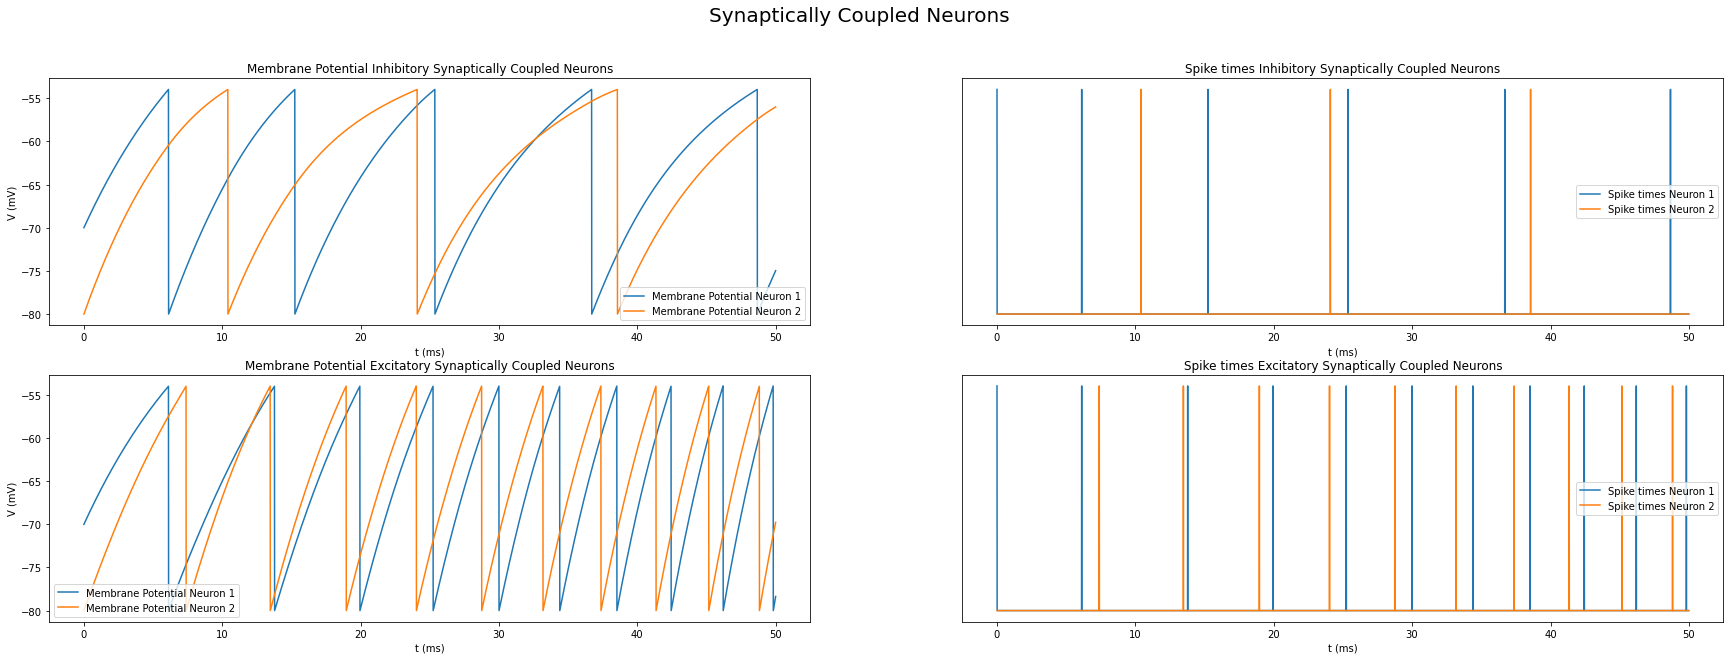

In [21]:
dt = 0.00001
t_max= 0.050
t = np.arange(0, t_max, dt)
tspike1 = 0*10**-3+dt/2
V_0nrn1 = Em
V_0nrn2 = Vreset
'''
##############################################################################
one neuron should be initialized above threshold (ie firing at time 0)
voltage V_0nrn1 does not match with tspike1 spike time!
This changes the results and you would have to simulate longer to get rid of the effects of that.
##############################################################################
''';
Esyn = Einh = -100*10**-3
Vnrn1inh, Vnrn2inh, tspike1inh, tspike2inh, xnrn2inh = eulernrn(x_0, gsyn_0, V_0nrn1, V_0nrn2, tspike1, t)

#to make tspike dimensionless
for i in range(0, len(t)):
    if tspike1inh[i] == 0:
        tspike1inh[i] = False
    else:
        tspike1inh[i] = True
for i in range(0, len(t)):
    if tspike2inh[i] == 0:
        tspike2inh[i] = False
    else:
        tspike2inh[i] = True

tspike1 = 0*10**-3+dt/2
V_0nrn1 = Em
V_0nrn2 = Vreset
Esyn = Eexc = 0
Vnrn1exc, Vnrn2exc, tspike1exc, tspike2exc, xnrn2exc = eulernrn(x_0, gsyn_0, V_0nrn1, V_0nrn2, tspike1, t)

for i in range(0, len(t)):
    if tspike1exc[i] == 0:
        tspike1exc[i] = False
    else:
        tspike1exc[i] = True
for i in range(0, len(t)):
    if tspike2exc[i] == 0:
        tspike2exc[i] = False
    else:
        tspike2exc[i] = True

fig, axs = plt.subplots( 2, 2, figsize= (30,10))
plt.suptitle("Synaptically Coupled Neurons", size = 20)
axs[0,0].ticklabel_format(useOffset=False, style='plain')
axs[0,0].plot(t*10**3,Vnrn1inh*10**3)
axs[0,0].plot(t*10**3,Vnrn2inh*10**3)
axs[0,0].set_title("Membrane Potential Inhibitory Synaptically Coupled Neurons")
axs[0,0].set_xlabel("t (ms)")
axs[0,0].set_ylabel("V (mV)")
axs[0,0].legend(['Membrane Potential Neuron 1', 'Membrane Potential Neuron 2'])
axs[0,1].ticklabel_format(useOffset=False, style='plain')
axs[0,1].plot(t*10**3,tspike1inh*10**3)
axs[0,1].plot(t[1:]*10**3,tspike2inh[1:]*10**3)
axs[0,1].set_title("Spike times Inhibitory Synaptically Coupled Neurons")
axs[0,1].set_xlabel("t (ms)")
axs[0,1].yaxis.set_visible(False)
axs[0,1].legend(['Spike times Neuron 1', 'Spike times Neuron 2'])
axs[1,0].ticklabel_format(useOffset=False, style='plain')
axs[1,0].plot(t*10**3,Vnrn1exc*10**3)
axs[1,0].plot(t*10**3,Vnrn2exc*10**3)
axs[1,0].set_title("Membrane Potential Excitatory Synaptically Coupled Neurons")
axs[1,0].set_xlabel("t (ms)")
axs[1,0].set_ylabel("V (mV)")
axs[1,0].legend(['Membrane Potential Neuron 1', 'Membrane Potential Neuron 2'])
axs[1,1].ticklabel_format(useOffset=False, style='plain')
axs[1,1].plot(t*10**3,tspike1exc*10**3)
axs[1,1].plot(t[1:]*10**3,tspike2exc[1:]*10**3)
axs[1,1].set_title("Spike times Excitatory Synaptically Coupled Neurons")
axs[1,1].set_xlabel("t (ms)")
axs[1,1].yaxis.set_visible(False)
axs[1,1].legend(['Spike times Neuron 1', 'Spike times Neuron 2'])

The membrane response to an inhibitory synaptic spike of the other neuron in our two-neurons-model slows down the change in membrane potential towards the threshold potential. This will lower the firing rate and has a bad effect on the firing synchrony of the both neurons. The spike times of the neurons won't fall into a pattern. This is in contrast with the results of the membrane respons to an excitatory synaptic spike. A spike from the other neuron will accelerate the change in membrane potential towards the threshold potential and after some time, this change is constant as well as the pattern of spike times of the two neurons.

In [ ]:
'''
##############################################################################
No, inhibition actually leads to in-phase synchronization here!
Increase your simulation time and resolve the initial condition error.

Detail:
Not really necessary to show the spike times, they are visible from the v-reset.
If you do show them, better to stack them vertically.
##############################################################################
''';

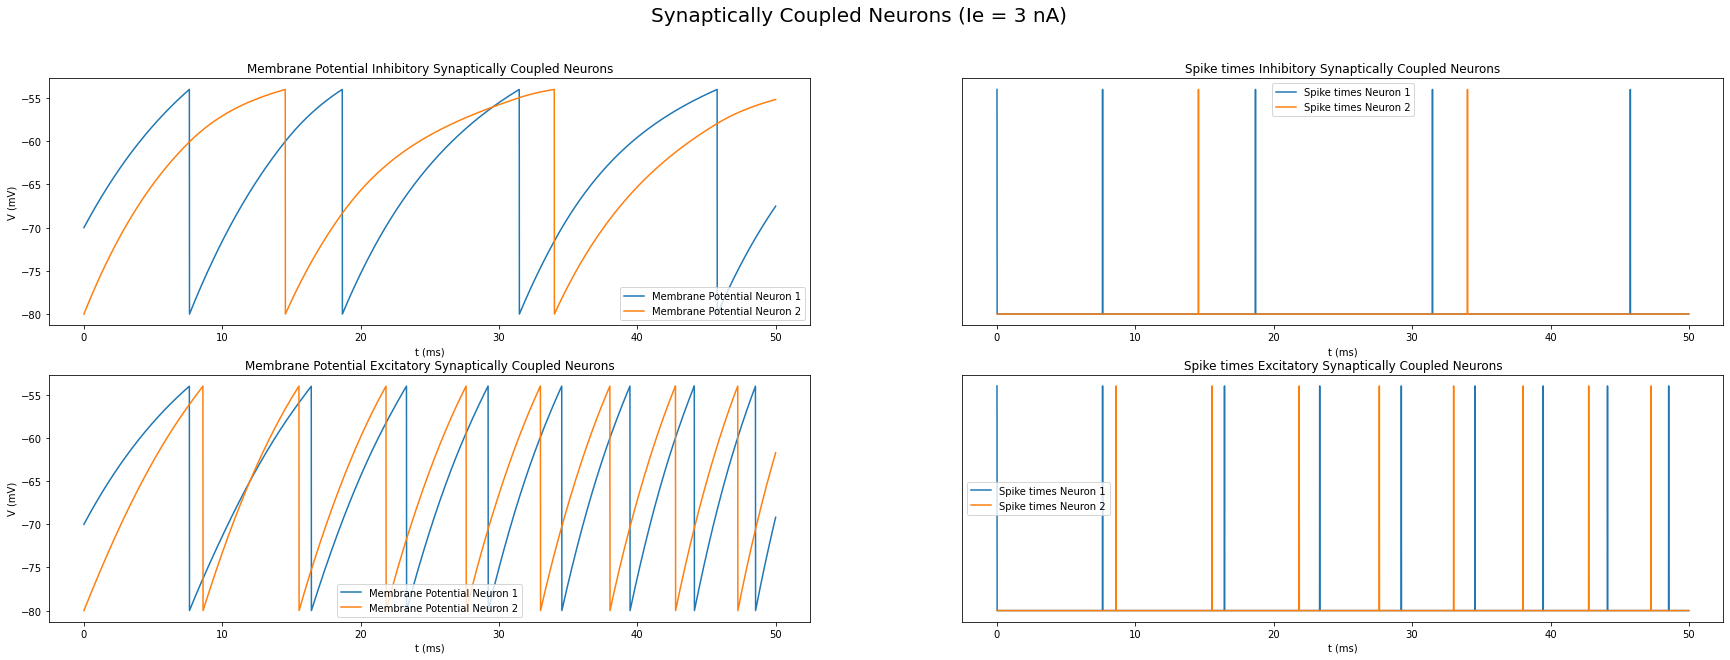

In [22]:
RmIe = 10**7*3*10**-9 

dt = 0.00001
t_max= 0.050
t = np.arange(0, t_max, dt)
tspike1 = 0*10**-3+dt/2
V_0nrn1 = Em
V_0nrn2 = Vreset
Esyn = Einh = -100*10**-3
Vnrn1inh, Vnrn2inh, tspike1inh, tspike2inh, xnrn2inh = eulernrn(x_0, gsyn_0, V_0nrn1, V_0nrn2, tspike1, t)

for i in range(0, len(t)):
    if tspike1inh[i] == 0:
        tspike1inh[i] = False
    else:
        tspike1inh[i] = True
for i in range(0, len(t)):
    if tspike2inh[i] == 0:
        tspike2inh[i] = False
    else:
        tspike2inh[i] = True

tspike1 = 0*10**-3+dt/2
V_0nrn1 = Em
V_0nrn2 = Vreset
Esyn = Eexc = 0
Vnrn1exc, Vnrn2exc, tspike1exc, tspike2exc, xnrn2exc = eulernrn(x_0, gsyn_0, V_0nrn1, V_0nrn2, tspike1, t)

for i in range(0, len(t)):
    if tspike1exc[i] == 0:
        tspike1exc[i] = False
    else:
        tspike1exc[i] = True
for i in range(0, len(t)):
    if tspike2exc[i] == 0:
        tspike2exc[i] = False
    else:
        tspike2exc[i] = True

fig, axs = plt.subplots( 2, 2, figsize= (30,10))
plt.suptitle("Synaptically Coupled Neurons (Ie = 3 nA)", size = 20)
axs[0,0].ticklabel_format(useOffset=False, style='plain')
axs[0,0].plot(t*10**3,Vnrn1inh*10**3)
axs[0,0].plot(t*10**3,Vnrn2inh*10**3)
axs[0,0].set_title("Membrane Potential Inhibitory Synaptically Coupled Neurons")
axs[0,0].set_xlabel("t (ms)")
axs[0,0].set_ylabel("V (mV)")
axs[0,0].legend(['Membrane Potential Neuron 1', 'Membrane Potential Neuron 2'])
axs[0,1].ticklabel_format(useOffset=False, style='plain')
axs[0,1].plot(t*10**3,tspike1inh*10**3)
axs[0,1].plot(t[1:]*10**3,tspike2inh[1:]*10**3)
axs[0,1].set_title("Spike times Inhibitory Synaptically Coupled Neurons")
axs[0,1].set_xlabel("t (ms)")
axs[0,1].yaxis.set_visible(False)
axs[0,1].legend(['Spike times Neuron 1', 'Spike times Neuron 2'])
axs[1,0].ticklabel_format(useOffset=False, style='plain')
axs[1,0].plot(t*10**3,Vnrn1exc*10**3)
axs[1,0].plot(t*10**3,Vnrn2exc*10**3)
axs[1,0].set_title("Membrane Potential Excitatory Synaptically Coupled Neurons")
axs[1,0].set_xlabel("t (ms)")
axs[1,0].set_ylabel("V (mV)")
axs[1,0].legend(['Membrane Potential Neuron 1', 'Membrane Potential Neuron 2'])
axs[1,1].ticklabel_format(useOffset=False, style='plain')
axs[1,1].plot(t*10**3,tspike1exc*10**3)
axs[1,1].plot(t[1:]*10**3,tspike2exc[1:]*10**3)
axs[1,1].set_title("Spike times Excitatory Synaptically Coupled Neurons")
axs[1,1].set_xlabel("t (ms)")
axs[1,1].yaxis.set_visible(False)
axs[1,1].legend(['Spike times Neuron 1', 'Spike times Neuron 2'])

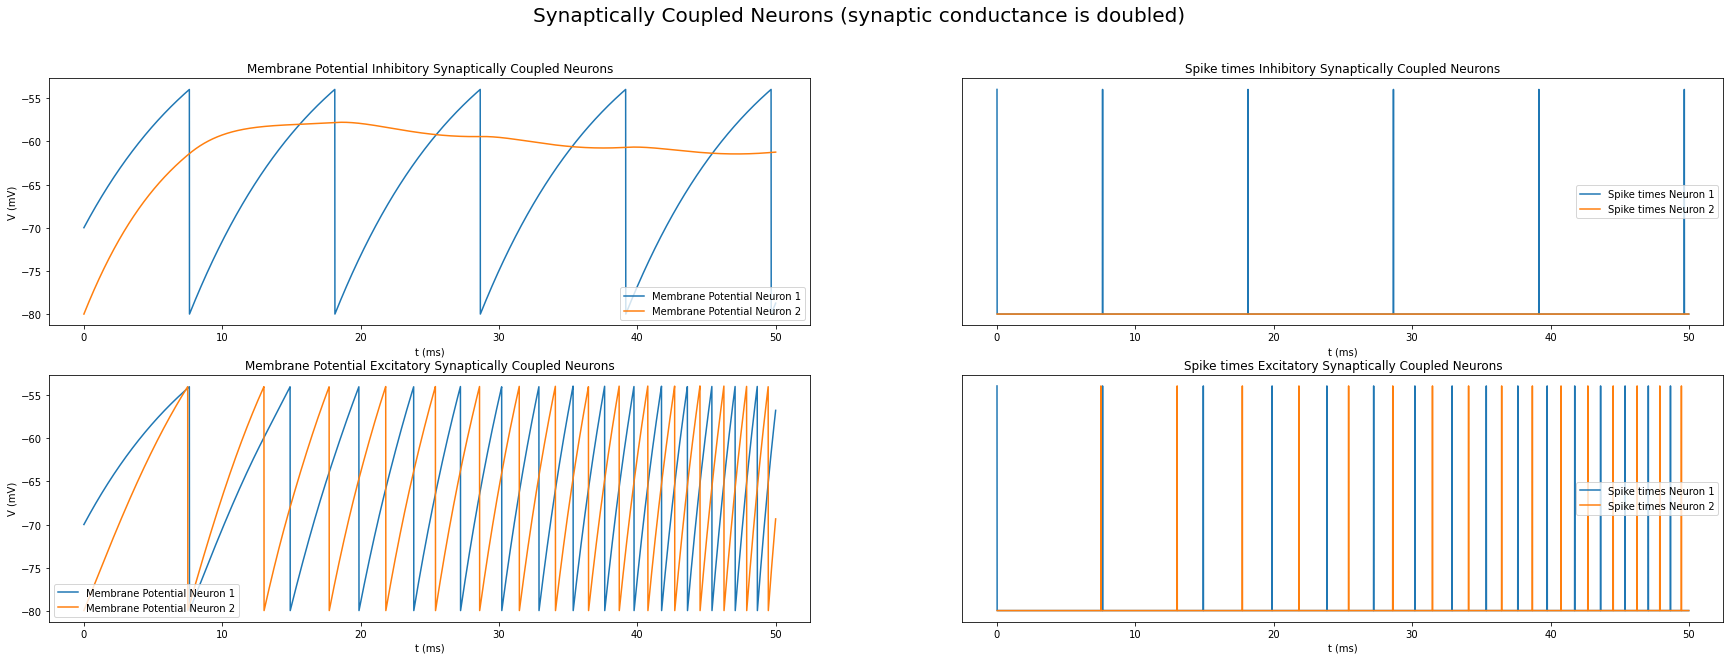

In [23]:
gstat = 60*10**-9
dt = 0.00001
t_max= 0.050
t = np.arange(0, t_max, dt)
tspike1 = 0*10**-3+dt/2
V_0nrn1 = Em
V_0nrn2 = Vreset
Esyn = Einh = -100*10**-3
Vnrn1inh, Vnrn2inh, tspike1inh, tspike2inh, xnrn2inh = eulernrn(x_0, gsyn_0, V_0nrn1, V_0nrn2, tspike1, t)

for i in range(0, len(t)):
    if tspike1inh[i] == 0:
        tspike1inh[i] = False
    else:
        tspike1inh[i] = True
for i in range(0, len(t)):
    if tspike2inh[i] == 0:
        tspike2inh[i] = False
    else:
        tspike2inh[i] = True

tspike1 = 0*10**-3+dt/2
V_0nrn1 = Em
V_0nrn2 = Vreset
Esyn = Eexc = 0
Vnrn1exc, Vnrn2exc, tspike1exc, tspike2exc, xnrn2exc = eulernrn(x_0, gsyn_0, V_0nrn1, V_0nrn2, tspike1, t)

for i in range(0, len(t)):
    if tspike1exc[i] == 0:
        tspike1exc[i] = False
    else:
        tspike1exc[i] = True
for i in range(0, len(t)):
    if tspike2exc[i] == 0:
        tspike2exc[i] = False
    else:
        tspike2exc[i] = True
fig, axs = plt.subplots( 2, 2, figsize= (30,10))
plt.suptitle("Synaptically Coupled Neurons (synaptic conductance is doubled)", size = 20)
axs[0,0].ticklabel_format(useOffset=False, style='plain')
axs[0,0].plot(t*10**3,Vnrn1inh*10**3)
axs[0,0].plot(t*10**3,Vnrn2inh*10**3)
axs[0,0].set_title("Membrane Potential Inhibitory Synaptically Coupled Neurons")
axs[0,0].set_xlabel("t (ms)")
axs[0,0].set_ylabel("V (mV)")
axs[0,0].legend(['Membrane Potential Neuron 1', 'Membrane Potential Neuron 2'])
axs[0,1].ticklabel_format(useOffset=False, style='plain')
axs[0,1].plot(t*10**3,tspike1inh*10**3)
axs[0,1].plot(t[1:]*10**3,tspike2inh[1:]*10**3)
axs[0,1].set_title("Spike times Inhibitory Synaptically Coupled Neurons")
axs[0,1].set_xlabel("t (ms)")
axs[0,1].yaxis.set_visible(False)
axs[0,1].legend(['Spike times Neuron 1', 'Spike times Neuron 2'])
axs[1,0].ticklabel_format(useOffset=False, style='plain')
axs[1,0].plot(t*10**3,Vnrn1exc*10**3)
axs[1,0].plot(t*10**3,Vnrn2exc*10**3)
axs[1,0].set_title("Membrane Potential Excitatory Synaptically Coupled Neurons")
axs[1,0].set_xlabel("t (ms)")
axs[1,0].set_ylabel("V (mV)")
axs[1,0].legend(['Membrane Potential Neuron 1', 'Membrane Potential Neuron 2'])
axs[1,1].ticklabel_format(useOffset=False, style='plain')
axs[1,1].plot(t*10**3,tspike1exc*10**3)
axs[1,1].plot(t[1:]*10**3,tspike2exc[1:]*10**3)
axs[1,1].set_title("Spike times Excitatory Synaptically Coupled Neurons")
axs[1,1].set_xlabel("t (ms)")
axs[1,1].yaxis.set_visible(False)
axs[1,1].legend(['Spike times Neuron 1', 'Spike times Neuron 2'])

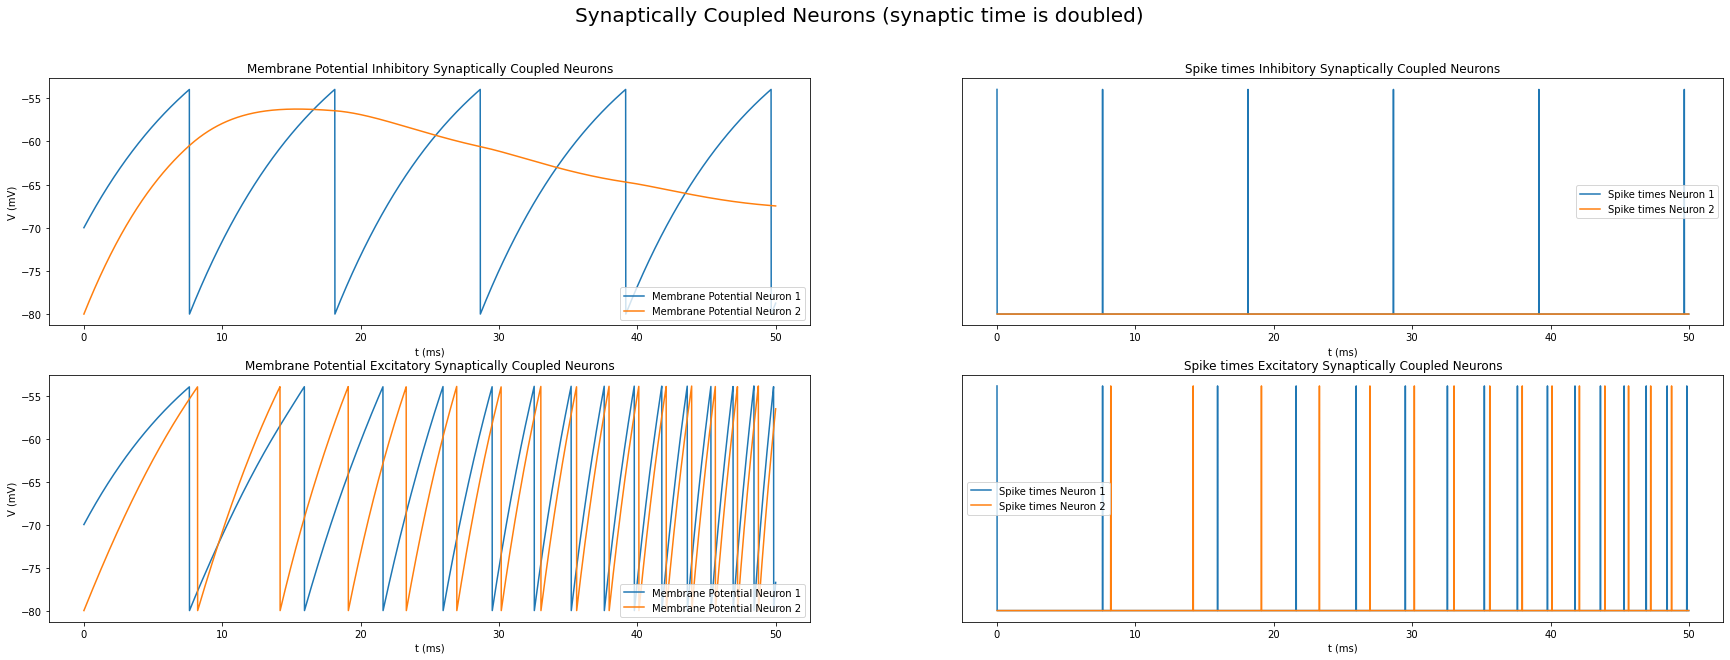

In [24]:
Tsyn = 20*10**-3
dt = 0.00001
t_max= 0.050
t = np.arange(0, t_max, dt)
tspike1 = 0*10**-3+dt/2
V_0nrn1 = Em
V_0nrn2 = Vreset
Esyn = Einh = -100*10**-3
Vnrn1inh, Vnrn2inh, tspike1inh, tspike2inh, xnrn2inh = eulernrn(x_0, gsyn_0, V_0nrn1, V_0nrn2, tspike1, t)

for i in range(0, len(t)):
    if tspike1inh[i] == 0:
        tspike1inh[i] = False
    else:
        tspike1inh[i] = True
for i in range(0, len(t)):
    if tspike2inh[i] == 0:
        tspike2inh[i] = False
    else:
        tspike2inh[i] = True

tspike1 = 0*10**-3+dt/2
V_0nrn1 = Em
V_0nrn2 = Vreset
Esyn = Eexc = 0
Vnrn1exc, Vnrn2exc, tspike1exc, tspike2exc, xnrn2exc = eulernrn(x_0, gsyn_0, V_0nrn1, V_0nrn2, tspike1, t)

for i in range(0, len(t)):
    if tspike1exc[i] == 0:
        tspike1exc[i] = False
    else:
        tspike1exc[i] = True
for i in range(0, len(t)):
    if tspike2exc[i] == 0:
        tspike2exc[i] = False
    else:
        tspike2exc[i] = True
fig, axs = plt.subplots( 2, 2, figsize= (30,10))
plt.suptitle("Synaptically Coupled Neurons (synaptic time is doubled)", size = 20)
axs[0,0].ticklabel_format(useOffset=False, style='plain')
axs[0,0].plot(t*10**3,Vnrn1inh*10**3)
axs[0,0].plot(t*10**3,Vnrn2inh*10**3)
axs[0,0].set_title("Membrane Potential Inhibitory Synaptically Coupled Neurons")
axs[0,0].set_xlabel("t (ms)")
axs[0,0].set_ylabel("V (mV)")
axs[0,0].legend(['Membrane Potential Neuron 1', 'Membrane Potential Neuron 2'])
axs[0,1].ticklabel_format(useOffset=False, style='plain')
axs[0,1].plot(t*10**3,tspike1inh*10**3)
axs[0,1].plot(t[1:]*10**3,tspike2inh[1:]*10**3)
axs[0,1].set_title("Spike times Inhibitory Synaptically Coupled Neurons")
axs[0,1].set_xlabel("t (ms)")
axs[0,1].yaxis.set_visible(False)
axs[0,1].legend(['Spike times Neuron 1', 'Spike times Neuron 2'])
axs[1,0].ticklabel_format(useOffset=False, style='plain')
axs[1,0].plot(t*10**3,Vnrn1exc*10**3)
axs[1,0].plot(t*10**3,Vnrn2exc*10**3)
axs[1,0].set_title("Membrane Potential Excitatory Synaptically Coupled Neurons")
axs[1,0].set_xlabel("t (ms)")
axs[1,0].set_ylabel("V (mV)")
axs[1,0].legend(['Membrane Potential Neuron 1', 'Membrane Potential Neuron 2'])
axs[1,1].ticklabel_format(useOffset=False, style='plain')
axs[1,1].plot(t*10**3,tspike1exc*10**3)
axs[1,1].plot(t[1:]*10**3,tspike2exc[1:]*10**3)
axs[1,1].set_title("Spike times Excitatory Synaptically Coupled Neurons")
axs[1,1].set_xlabel("t (ms)")
axs[1,1].yaxis.set_visible(False)
axs[1,1].legend(['Spike times Neuron 1', 'Spike times Neuron 2'])

In [ ]:
'''
##############################################################################
Nice! 
interpretation??
##############################################################################
''';